# Deep Learning Project: Classification of Somali Amphibian Images

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Phase 1: Data Preparation
# - Load data from Excel file
# - Load and preprocess images

In [13]:
# Load the Excel file containing image data
data = pd.read_csv('C:/Users/DAAH/Downloads/som_amphi/excel_files/SVM_som_amph.csv', encoding='latin-1')


In [17]:
# Set up file paths and load images
images_folder = 'C:/Users/DAAH/Downloads/som_amphi/images'
image_filenames = data['Image Filename'].tolist()
images = []


In [ ]:
# Load and preprocess images
for filename in image_filenames:
    image_path = os.path.join(images_folder, filename)  # Use os.path.join() for correct path concatenation
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image / 255.0  # Normalize the pixel values
    images.append(image)

images = np.array(images)

In [18]:
# Convert labels to one-hot encoded vectors
labels = pd.get_dummies(data['Latin Name']).values



In [19]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



# Phase 2: Model Building
# - Define the CNN architecture
# - Compile the model with optimizer, loss function, and metrics

In [20]:
# Build the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(labels.shape[1], activation='softmax')
])



In [21]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [22]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))



Epoch 1/10


1/1 [==============================] - 6s 6s/step - loss: 3.5389 - accuracy: 0.0000e+00 - val_loss: 5.7958 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 3.6398 - accuracy: 0.0370 - val_loss: 5.0311 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 3.1972 - accuracy: 0.0741 - val_loss: 4.5077 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 2.7948 - accuracy: 0.4074 - val_loss: 4.6258 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 2.3937 - accuracy: 0.7407 - val_loss: 5.3063 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 1.7240 - accuracy: 0.8889 - val_loss: 6.4701 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.9297 - accuracy: 0.9630 - val_loss: 8.5781 - val_accuracy: 0.0000e+00
Epoch 8

# Phase 3: Model Training
# - Train the model on training data
# - Validate the model on testing data

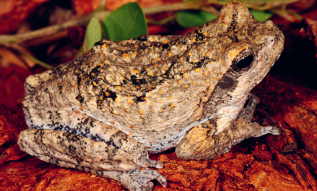

In [35]:
from IPython.display import Image

new_image_path = 'C:/Users/DAAH/Downloads/som_amphi/images/WhatsApp Image 2024-02-29 at 13.21.46.jpeg'
Image(filename=image_path)

In [36]:
# Predict on new images
new_image = tf.keras.preprocessing.image.load_img(new_image_path, target_size=(224, 224))
new_image = tf.keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.0  # Normalize the pixel values
new_image = np.expand_dims(new_image, axis=0)


In [37]:
prediction = model.predict(new_image)
predicted_species_index = np.argmax(prediction)
predicted_species = data['English Name'][predicted_species_index]
predicted_latin_name = data['Latin Name'][predicted_species_index]
predicted_location = data['Location'][predicted_species_index]



1/1 [==============================] - 0s 47ms/step


# Phase 4: Inference
# - Predict on new images
# - Print the predicted species, Latin name, and location

In [38]:
print("Predicted Species:", predicted_species)
print("Predicted Latin Name:", predicted_latin_name)
print("Predicted Location:", predicted_location)

Predicted Species: East African Puddle Frog
Predicted Latin Name: Phrynobatrachus acridoides
Predicted Location: Jubbada Dhexe, Jubbada Hoose, Shabeellaha Hoose


# Saving the Model

In [ ]:
model.save("../cnn_model.keras")